<a href="https://colab.research.google.com/github/Bhumika-Chauhan09/cleanin_data/blob/main/temp_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Temperature Alert: 23.99°C exceeds the limit of 23.87°C at 13-09-2023 00:31.
Temperature Alert: 23.99°C exceeds the limit of 23.87°C at 13-09-2023 00:52.
Temperature Alert: 23.99°C exceeds the limit of 23.87°C at 13-09-2023 01:29.
Temperature Alert: 23.89°C exceeds the limit of 23.87°C at 13-09-2023 02:10.
Temperature Alert: 23.89°C exceeds the limit of 23.87°C at 13-09-2023 02:44.
Temperature Alert: 23.89°C exceeds the limit of 23.87°C at 13-09-2023 03:08.


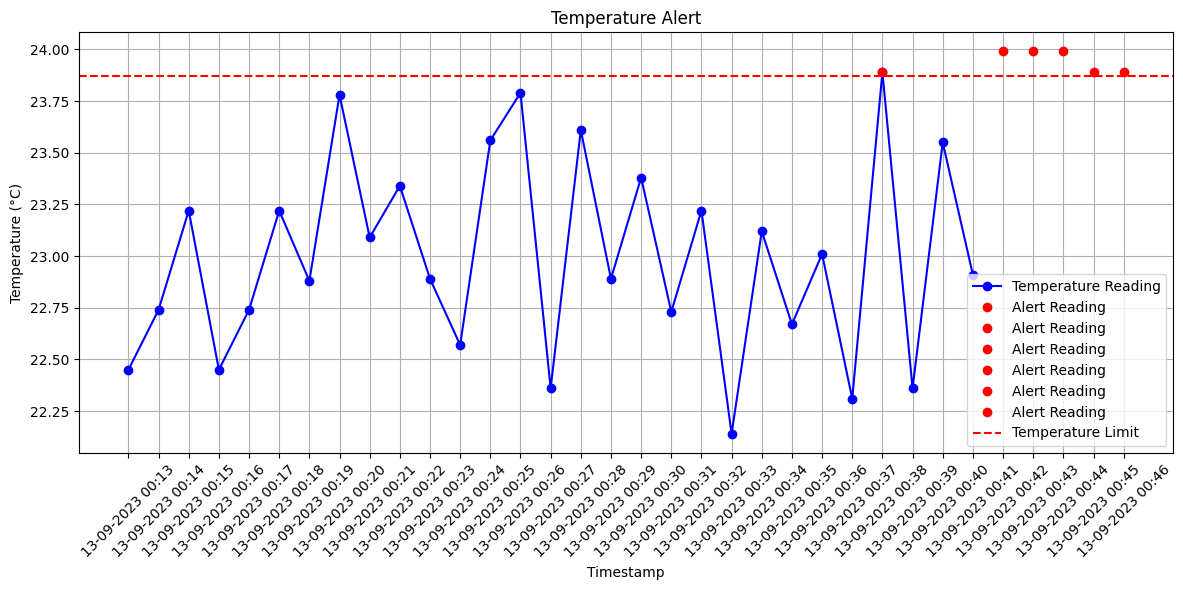

In [ ]:
# Install necessary libraries if they are not already installed
import tkinter as tk
import csv
import time
from IPython.display import display, clear_output
import matplotlib.pyplot as plt

# Enable Matplotlib inline mode
%matplotlib inline

# Function to check sensor data and generate alerts
def check_sensor_data():
    # Replace 'sensor_data.csv' with the path to your uploaded CSV file
    csv_file = 'temp_data.csv'

    try:
        timestamps = []
        temperatures = []

        with open(csv_file, 'r') as file:
            reader = csv.reader(file)
            # Assuming the first row contains headers, skip it
            next(reader)

            # Read all temperature readings and timestamps
            for row in reader:
                timestamp, temperature = row
                timestamps.append(timestamp)
                temperature = float(temperature)
                temperatures.append(temperature)

        # Define the temperature limit for the alert
        temperature_limit = 23.87  # Adjust to your desired limit

        # Create a list to store alert readings
        alert_readings = []

        # Check if each temperature reading exceeds the limit
        for timestamp, temperature in zip(timestamps, temperatures):
            if temperature > temperature_limit:
                alert_readings.append((timestamp, temperature))

        if alert_readings:
            # Log the alert to the Colab output
            clear_output(wait=True)
            for timestamp, temperature in alert_readings:
                alert_message = f"Temperature Alert: {temperature}°C exceeds the limit of {temperature_limit}°C at {timestamp}."
                print(alert_message)

            # Create a plot to visualize all temperature readings
            plt.figure(figsize=(12, 6))
            # Select a subset of timestamps for display (e.g., every 10th timestamp)
            selected_timestamps = timestamps[::7]
            selected_temperatures = temperatures[::7]

            plt.plot(selected_timestamps, selected_temperatures, 'bo-', label='Temperature Reading')
           # plt.plot(timestamps, temperatures, 'bo-', label='Temperature Reading')

            # Highlight alert readings in red
            for timestamp, temperature in alert_readings:
                plt.plot(timestamp, temperature, 'ro', label='Alert Reading')

            plt.axhline(temperature_limit, color='r', linestyle='--', label='Temperature Limit')
            plt.xlabel('Timestamp')
            plt.ylabel('Temperature (°C)')
            plt.legend()
            plt.title('Temperature Alert')

            # Format timestamp labels for better readability
            plt.gca().xaxis.set_major_formatter(plt.FixedFormatter(timestamps))
            plt.xticks(rotation=45)
            plt.grid(True)
            plt.tight_layout()
            plt.show()

    except FileNotFoundError:
        print(f"CSV file '{csv_file}' not found.")
    except Exception as e:
        print(f"Error reading CSV file: {str(e)}")

# Run the periodic sensor data check
while True:
    check_sensor_data()
    # Adjust the sleep duration (in seconds) based on your project requirements
    time.sleep(60)  # Check every minute
